In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import json
import copy

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!unzip /content/drive/MyDrive/Dataset.zip -d Dataset
!unzip /content/drive/MyDrive/Patterns.zip -d Patterns

Archive:  /content/drive/MyDrive/Dataset.zip
 extracting: Dataset/1644359422.816138.jpg  
  inflating: Dataset/1644359422.816138.json  
 extracting: Dataset/1644360063.82364.jpg  
  inflating: Dataset/1644360063.82364.json  
 extracting: Dataset/1644362482.7094185.jpg  
  inflating: Dataset/1644362482.7094185.json  
 extracting: Dataset/1644368971.6154966.jpg  
  inflating: Dataset/1644368971.6154966.json  
 extracting: Dataset/1644369207.922902.jpg  
  inflating: Dataset/1644369207.922902.json  
 extracting: Dataset/1644369658.7214494.jpg  
  inflating: Dataset/1644369658.7214494.json  
 extracting: Dataset/1644369774.9055796.jpg  
  inflating: Dataset/1644369774.9055796.json  
 extracting: Dataset/1644369801.9909956.jpg  
  inflating: Dataset/1644369801.9909956.json  
 extracting: Dataset/1644369842.0238864.jpg  
  inflating: Dataset/1644369842.0238864.json  
 extracting: Dataset/1644369905.2248352.jpg  
  inflating: Dataset/1644369905.2248352.json  
 extracting: Dataset/1644369972.1

In [4]:
img_name = "/content/Dataset/1644362482.7094185.jpg"
json_name = img_name[:-3] + "json"

{'version': '4.6.0', 'flags': {}, 'shapes': [{'label': 'tarak', 'points': [[79.09687805175781, 1215.562744140625], [80.00135803222656, 1201.7586669921875], [139.90184020996094, 1209.3419189453125], [264.99603271484375, 1215.8404541015625], [300.0096740722656, 1205.0609130859375], [400.0209045410156, 1209.881591796875], [602.4622802734375, 1225.2318115234375], [714.9291381835938, 1240.118896484375], [711.7730712890625, 1253.074462890625], [640.333740234375, 1247.73583984375], [458.5068664550781, 1226.5435791015625], [314.72479248046875, 1227.0577392578125], [250.54476928710938, 1235.2852783203125], [214.39859008789062, 1231.818115234375]], 'group_id': None, 'shape_type': 'polygon', 'flags': {}}], 'imagePath': '1644362482.7094185.jpg', 'imageData': None, 'imageHeight': 2048, 'imageWidth': 2592, 'pattern': 'AYLIN.tif'}


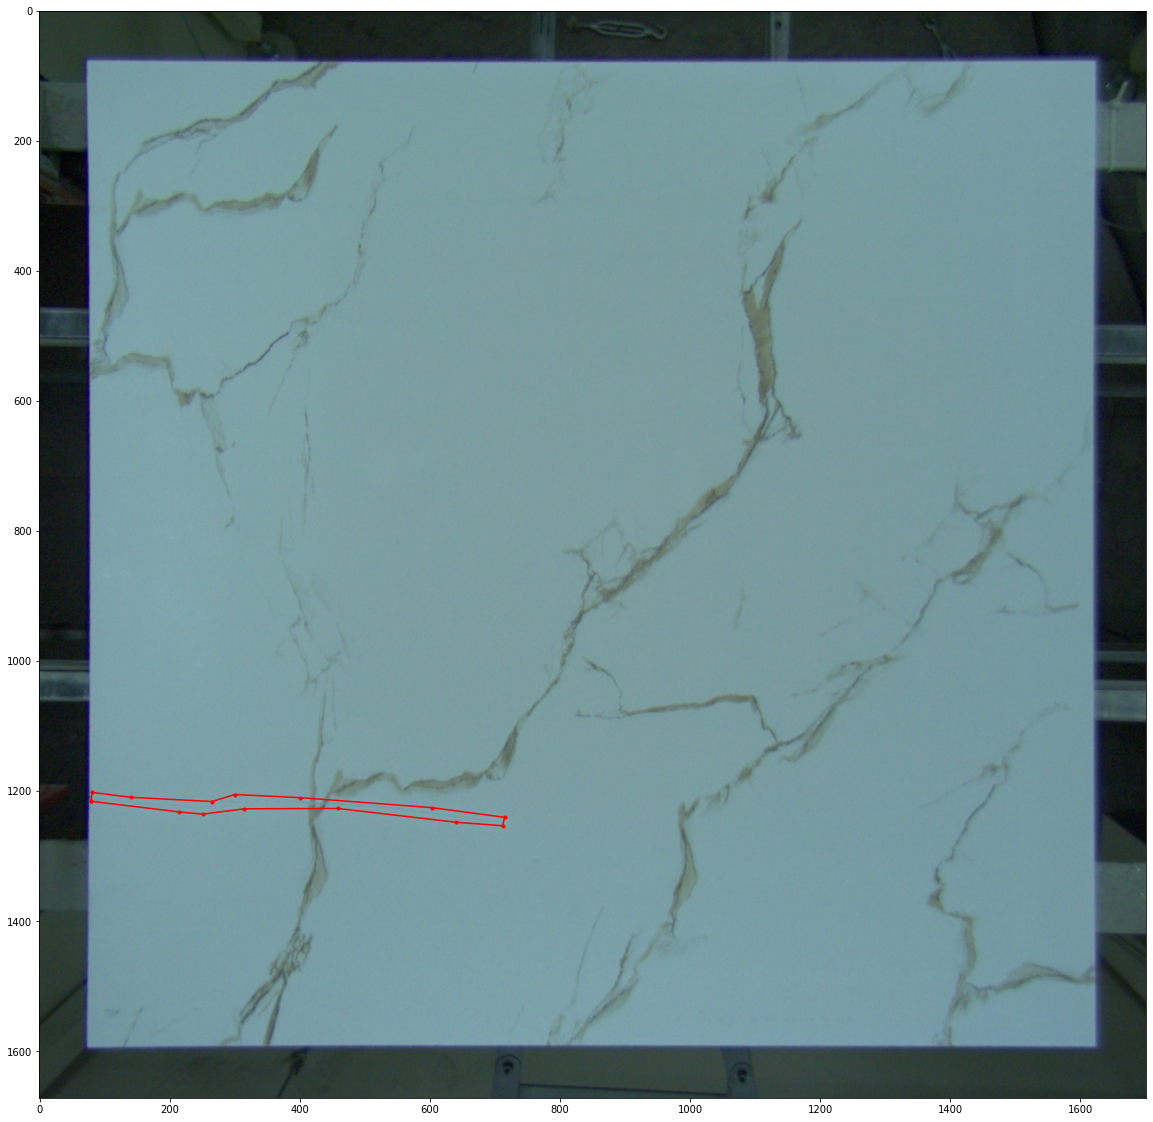

In [5]:
img = cv.imread(img_name)

f = open(json_name, encoding="utf8")
data = json.load(f)
print(data)
f.close()

plt.figure(figsize=(20, 20))
plt.imshow(img[..., ::-1])

for shape in data["shapes"]:
  points = np.array(shape['points'])
  ind = list(np.arange(points.shape[0])) + [0]
  plt.plot(points[ind, 0], points[ind, 1], 'r.-')
  # plt.plot(points[-1:-3:-1, 0], points[-1:-3:-1, 1], 'r')

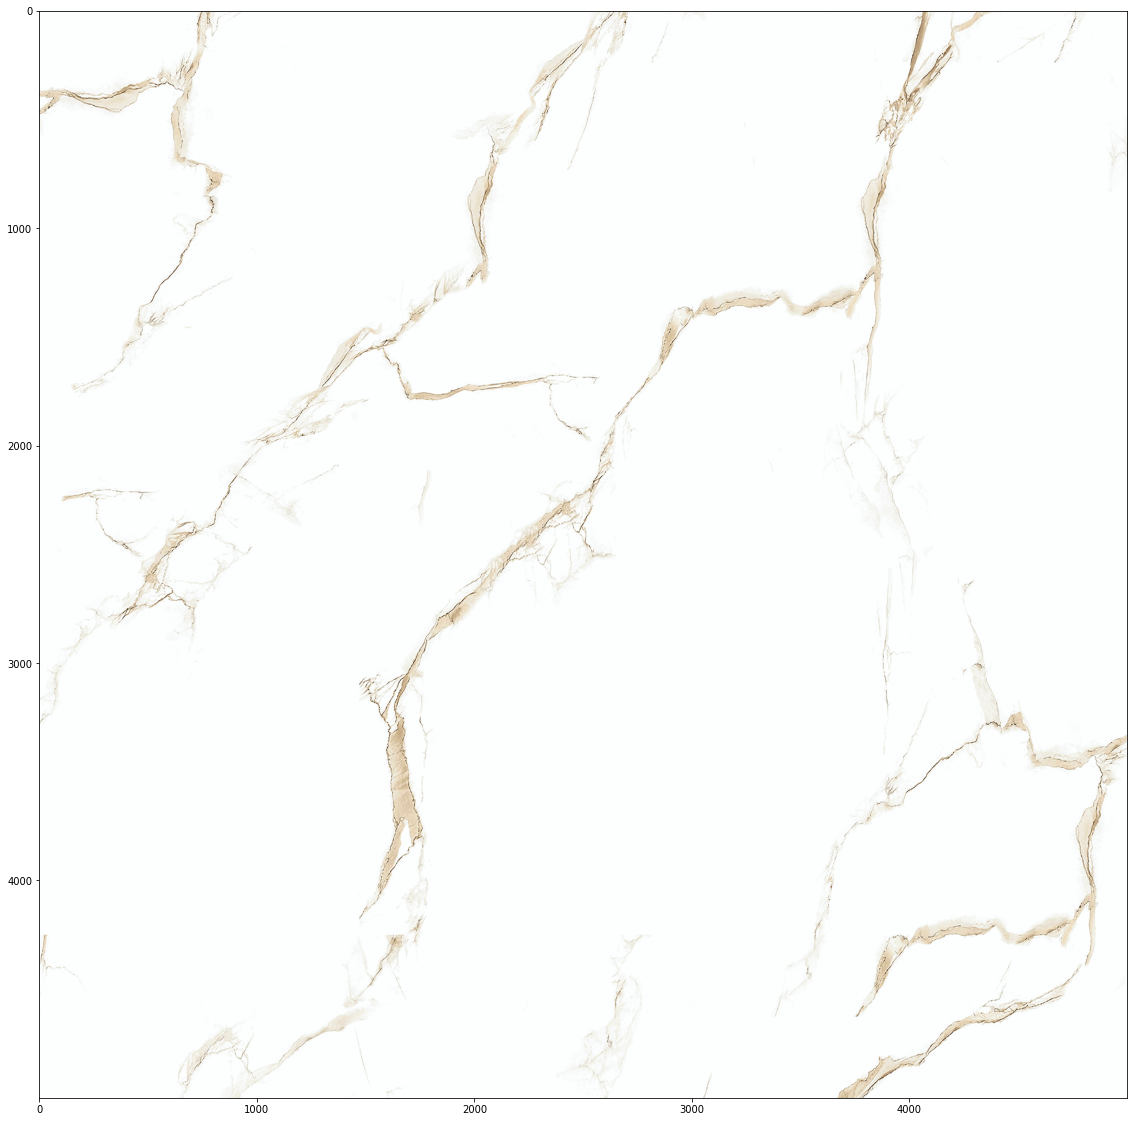

In [6]:
pattern = cv.imread('/content/Patterns/' + data['pattern'])

plt.figure(figsize=(20, 20))
plt.imshow(pattern[..., ::-1])

In [7]:
def imshow(im):
    width, height, *channels = im.shape
    if channels:
        # By default, OpenCV tends to work with images in the BGR format.
        # This is due to some outdated practices, but it has been left in the library.
        # We can iterate the channels in reverse order to get an RGB image.
        plt.imshow(im[:,:,::-1])
    else:
        plt.imshow(im, cmap='gray')
    plt.axis('off')

<ipython-input-8-22547becae8a>:21: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  convexed_contours = np.array([cv.convexHull(contour) for contour in contours])


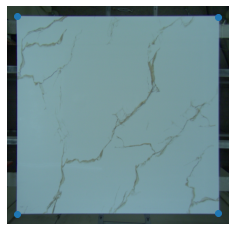

In [8]:
import copy
def to_grayscale(im):
    # Your code goes here.
    return cv.cvtColor(im, cv.COLOR_BGR2GRAY)
grayscale = to_grayscale(img)
imshow(grayscale)
def blur(im):
    # Your code goes here.
    return cv.bilateralFilter(im, 9, 75, 75)
blurred = blur(grayscale)
imshow(blurred)
def to_edges(im):
    # Your code goes here.
    return cv.Canny(im, 3, 25)
edges = to_edges(blurred)
imshow(edges)
def find_vertices(im):
    edges = copy.deepcopy(im)
    contours, _ = cv.findContours(edges, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    
    convexed_contours = np.array([cv.convexHull(contour) for contour in contours])

    for contour in sorted(convexed_contours, key = cv.contourArea, reverse = True):
        p = cv.arcLength(contour, True) # perimeter aproximation
        polygon_vertices = cv.approxPolyDP(contour, 0.02*p, True)
        
        if len(polygon_vertices) == 4:
            return polygon_vertices[:, 0]
imshow(img)
vertices = find_vertices(edges)
plt.scatter([x for x, y in vertices], [y for x, y in vertices])

In [9]:
def blank_page(im):
    # Repeated Closing operation to remove text from the document.
    kernel = np.ones((5,5),np.uint8)
    img = cv.morphologyEx(im, cv.MORPH_CLOSE, kernel, iterations= 3)

    mask = np.zeros(img.shape[:2],np.uint8)
    bgdModel = np.zeros((1,65),np.float64)
    fgdModel = np.zeros((1,65),np.float64)
    rect = (20,20,img.shape[1]-20,img.shape[0]-20)
    cv.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv.GC_INIT_WITH_RECT)
    mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
    img = img*mask2[:,:,np.newaxis]
    return img

In [10]:
def to_grayscale(im):
    # Your code goes here.
    img = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
    return img

In [11]:
def blur(im):
    # Your code goes here.
    return cv.bilateralFilter(im, 9, 75, 75)

In [12]:
def to_edges(im):
    # Your code goes here.
    return cv.Canny(im, 3, 25)

In [13]:
def find_vertices(im):
    edges = copy.deepcopy(im)
    contours, _ = cv.findContours(edges, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    
    convexed_contours = np.array([cv.convexHull(contour) for contour in contours])

    for contour in sorted(convexed_contours, key = cv.contourArea, reverse = True):
        p = cv.arcLength(contour, True) # perimeter aproximation
        polygon_vertices = cv.approxPolyDP(contour, 0.02*p, True)
        
        if len(polygon_vertices) == 4:
            return polygon_vertices[:, 0]

In [14]:
def reorder(vertices):
    # OpenCV *prefers* if we use `np.float32`.
    reordered = np.zeros_like(vertices, dtype=np.float32)
    add = vertices.sum(1)
    reordered[0] = vertices[np.argmin(add)]
    reordered[2] = vertices[np.argmax(add)]
    diff = np.diff(vertices, axis=1)
    reordered[1] = vertices[np.argmin(diff)]
    reordered[3] = vertices[np.argmax(diff)]
    return reordered

In [15]:
def crop_out(im, vertices):
    # Your code goes here.
    vertices = reorder(vertices)
    (a, b, c, d) = vertices
    w1 = np.sqrt(((c[0] - d[0]) ** 2) + ((c[1] - d[1]) ** 2))
    w2 = np.sqrt(((b[0] - a[0]) ** 2) + ((b[1] - a[1]) ** 2))
    width = max(int(w1), int(w2))
    h1 = np.sqrt(((b[0] - c[0]) ** 2) + ((b[1] - c[1]) ** 2))
    h2 = np.sqrt(((a[0] - d[0]) ** 2) + ((a[1] - d[1]) ** 2))
    height = max(int(h1), int(h2))
    target = np.array([[0, 0], [width - 1, 0], [width - 1, height - 1], [0, height - 1]], dtype = "float32")
    
    transform = cv.getPerspectiveTransform(vertices, target)  # get the top or bird eye view effect
    return cv.warpPerspective(im, transform, (width, height))

In [16]:
"""blank = blank_page(img)
imshow(blank)"""

'blank = blank_page(img)\nimshow(blank)'

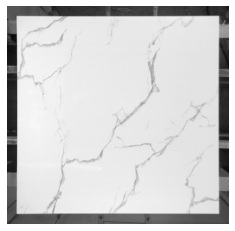

In [17]:
grayscale = to_grayscale(img)
imshow(grayscale)

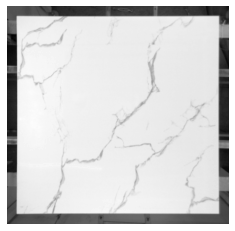

In [18]:
blurred = blur(grayscale)
imshow(blurred)

True

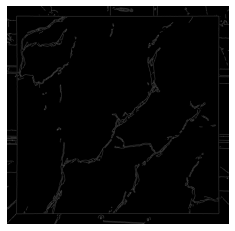

In [19]:
edges = to_edges(blurred)
imshow(edges)
cv.imwrite('edges.png', edges)

<ipython-input-13-82302404ae8d>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  convexed_contours = np.array([cv.convexHull(contour) for contour in contours])


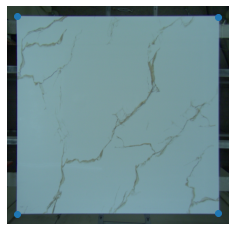

In [20]:
imshow(img)
vertices = find_vertices(edges)
plt.scatter([x for x, y in vertices], [y for x, y in vertices])

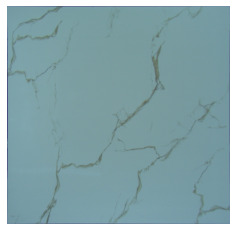

In [21]:
cropped = crop_out(img, vertices)
imshow(cropped)

In [22]:
from skimage import data
from skimage import exposure
from skimage.exposure import match_histograms

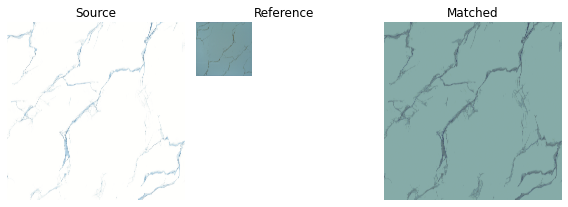

In [23]:
image = pattern
reference = cropped[..., ::-1]
# image = cropped[..., ::-1]
# reference = pattern

matched = match_histograms(image, reference, multichannel=True)
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(8, 3),
                                    sharex=True, sharey=True)
for aa in (ax1, ax2, ax3):
    aa.set_axis_off()

ax1.imshow(image)
ax1.set_title('Source')
ax2.imshow(reference)
ax2.set_title('Reference')
ax3.imshow(matched)
ax3.set_title('Matched')

plt.tight_layout()
plt.show()

In [24]:
cv.imwrite('matched.png', matched)

True

In [25]:
def rotate(x, deg):
  return x if deg == 0 \
  else np.rot90(x) if deg == 90 \
  else np.rot90(np.rot90(x)) if deg == 180 \
  else np.rot90(np.rot90(np.rot90(x)))

In [57]:
def warp_perspective(reference, matched):
  orb = cv.ORB_create()

  # detect and compute the keypoints and descriptors with ORB
  (kp1,des1) = orb.detectAndCompute(reference, None)
  (kp2,des2) = orb.detectAndCompute(matched, None)

  # create BFMatcher object
  bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)

  # Match descriptors.
  if des1 is None or des2 is None:
    return None
  matches = bf.match(des1,des2)

  # Sort them in the order of their distance. Least distance is better
  matches = sorted(matches, key=lambda val: val.distance)

  kp1_points = []
  kp2_points = []
  for mtch in matches:
    i, j = mtch.trainIdx, mtch.queryIdx
    kp1instance, kp2instance = kp1[j].pt, kp2[i].pt
    kp1_points.append(kp1instance)
    kp2_points.append(kp2instance)

  kp1_points, kp2_points = np.array(kp1_points), np.array(kp2_points)
  print(kp1_points.shape, kp2_points.shape)

  if len(kp2_points) < 4 or len(kp1_points) < 4:
    return None

  transform, _ = cv.findHomography(kp1_points, kp2_points, method=cv.RANSAC, ransacReprojThreshold=3.0)
  out = cv.warpPerspective(reference, transform, (width, height))
  return out

In [27]:
width, height = 512, 512

In [28]:
reference = cv.resize(reference, (width, height))
matched = cv.resize(matched, (width, height))

In [62]:
def wrap(image, pattern):
  best_dice =  dice_coef(image, pattern)
  best_rotated = image
  for deg in range(90, 271, 90):
    rotated = rotate(image, deg)
    dice = dice_coef(rotated, pattern)
    if dice > best_dice:
      best_dice = dice
      best_rotated = rotated

  rotated = warp_perspective(image, pattern)
  if rotated is not None:
    dice = dice_coef(rotated, pattern)
    if dice > best_dice:
      best_rotated = rotated
  return best_rotated

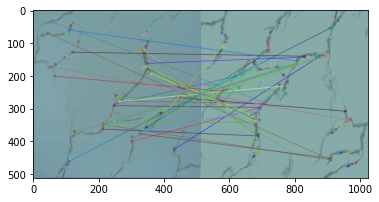

(<matplotlib.image.AxesImage at 0x7f401841b820>, None)

In [30]:
orb = cv.ORB_create()

# detect and compute the keypoints and descriptors with ORB
(kp1,des1) = orb.detectAndCompute(reference, None)
(kp2,des2) = orb.detectAndCompute(matched, None)

# create BFMatcher object
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)

# Match descriptors.
matches = bf.match(des1,des2)

# Sort them in the order of their distance. Least distance is better
matches = sorted(matches, key=lambda val: val.distance)

# Draw first 50 matches.
out = cv.drawMatches(reference, kp1, matched, kp2, matches[:50], None, flags=0)
plt.imshow(out), plt.show()

In [31]:
print(des1)

[[ 61  16 106 ... 143 112 241]
 [  3 205   3 ...  28 121 156]
 [  2 195  32 ...  28 176  72]
 ...
 [ 19 203 106 ... 156 188  76]
 [131 144 186 ... 140   1 113]
 [102   0 230 ... 108 245 214]]


In [32]:
kp1_points = []
kp2_points = []
for mtch in matches:
  i, j = mtch.trainIdx, mtch.queryIdx
  kp1instance, kp2instance = kp1[j].pt, kp2[i].pt
  kp1_points.append(kp1instance)
  kp2_points.append(kp2instance)

kp1_points, kp2_points = np.array(kp1_points), np.array(kp2_points)

In [33]:
# transform = cv.getPerspectiveTransform(kp1_points, kp2_points)
transform, _ = cv.findHomography(kp1_points, kp2_points, method=cv.RANSAC, ransacReprojThreshold=3.0)
print(transform)

[[-9.85599516e-01 -1.18980825e-02  5.08022578e+02]
 [-1.79519353e-03 -9.79593253e-01  5.03759498e+02]
 [-1.43494157e-05 -1.49845503e-05  1.00000000e+00]]


In [34]:
out = cv.warpPerspective(reference, transform, (width, height))

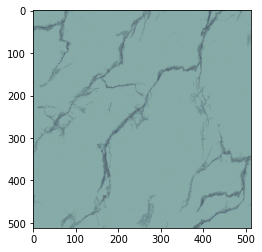

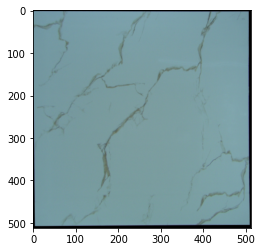

(<matplotlib.image.AxesImage at 0x7f40183baf10>, None)

In [35]:
plt.imshow(matched), plt.show()
plt.imshow(out), plt.show()

In [36]:
from matplotlib.path import Path



tupVerts = [[1392.602294921875, 773.4351196289062], [1395.87451171875, 788.0326538085938], [1351.0308837890625, 791.992431640625], [1288.8504638671875, 791.2113647460938], [1235.4697265625, 792.681396484375], [1126.8763427734375, 786.5694580078125], [1130.44873046875, 770.155029296875], [1190.5582275390625, 773.2726440429688], [1260.172607421875, 773.65869140625], [1303.3062744140625, 773.0651245117188], [1325.8836669921875, 778.3319702148438]]


print(tupVerts)

x, y = np.meshgrid(np.arange(width), np.arange(height)) # make a canvas with coordinates
x, y = x.flatten(), y.flatten()
points = np.vstack((x,y)).T 

p = Path(tupVerts) # make a polygon
grid = p.contains_points(points)
mask = grid.reshape(width,height) # now you have a mask with points inside a polygon
np.where(mask == True)

[[1392.602294921875, 773.4351196289062], [1395.87451171875, 788.0326538085938], [1351.0308837890625, 791.992431640625], [1288.8504638671875, 791.2113647460938], [1235.4697265625, 792.681396484375], [1126.8763427734375, 786.5694580078125], [1130.44873046875, 770.155029296875], [1190.5582275390625, 773.2726440429688], [1260.172607421875, 773.65869140625], [1303.3062744140625, 773.0651245117188], [1325.8836669921875, 778.3319702148438]]


(array([], dtype=int64), array([], dtype=int64))

In [37]:
def get_mask(tupVerts, image_height, image_width):
  # Scale down coordinates
  for i in range(len(tupVerts)):
    tupVerts[i][0] *= width / image_width
    tupVerts[i][1] *= height / image_height      

  x, y = np.meshgrid(np.arange(width), np.arange(height)) # make a canvas with coordinates
  x, y = x.flatten(), y.flatten()
  points = np.vstack((x,y)).T 
  p = Path(tupVerts) # make a polygon
  grid = p.contains_points(points)
  mask = grid.reshape(width,height) # now you have a mask with points inside a polygon     

  return mask

In [38]:
from skimage import data
from skimage import exposure
from skimage.exposure import match_histograms
def preproc(img, pattern):
    # blank = blank_page(img)
    # grayscale = to_grayscale(blank)
    grayscale = to_grayscale(img)
    blurred = blur(grayscale)
    edges = to_edges(blurred)
    vertices = find_vertices(edges)
    cropped = crop_out(img, vertices)
    image = pattern
    reference = cropped[..., ::-1]
    matched = match_histograms(image, reference, multichannel=True)
    reference = cv.resize(reference, (width, height))
    matched = cv.resize(matched, (width, height))    
    # print(np.float32(reference).shape, np.float32(matched).shape)
    reference = wrap(np.float32(reference), np.float32(matched))
    # reference = warp_perspective(reference, matched)
    return reference, matched

In [64]:
import os 
import random
from matplotlib.path import Path

x, y = np.meshgrid(np.arange(width), np.arange(height)) # make a canvas with coordinates
x, y = x.flatten(), y.flatten()
points = np.vstack((x,y)).T 

input1_list = []
input2_list = []
label_list = []
for name in os.listdir("Dataset/"):
  if name[-4:] == "json": 
      continue

  # Open image file
  img_name = f"/content/Dataset/{name}"
  image = cv.imread(img_name)

  # Open and load corresponding json into a dict
  json_dir = img_name[:-3] + "json"
  f = open(json_dir, encoding="utf8")
  data = json.load(f)
  # print(data)
  f.close()

  # Open pattern image
  pattern = cv.imread(f"/content/Patterns/{data['pattern']}")

  # Store original sizes before resizing
  image_height, image_width = image.shape[0], image.shape[1]

  image, pattern = preproc(image, pattern)

  # Resize both image and pattern 
  image = cv.resize(image, (width, height))
  pattern = cv.resize(pattern, (width, height))
  # print(f"image shape: {image.shape}")
  # print(f"pattern shape: {pattern.shape}")  

  # concatenate image and pattern
  input1, input2 = image, pattern
  input1_list.append(input1)
  input2_list.append(input2)
  # print(f"concated shape: {input.shape}")  

  # Store crack polygon coordinates
  tupVerts = []
  for shape in data['shapes']:
      tupVerts.extend(shape['points'])

  if len(tupVerts):
    mask = get_mask(tupVerts, image_height, image_width)
  else: 
    mask = [[False] * width for _ in range(height)]
  label = np.float32(mask)
  label_list.append(label)

  # debug
  # break 

label_list = np.array(label_list)
label_list = label_list.reshape((*label_list.shape, 1))

# Shuffle corresponing xs and ys
x_y = list(zip(input1_list, input2_list, label_list))
random.shuffle(x_y)
input1_list, input2_list, label_list = zip(*x_y)
input1_list, input2_list, label_list = list(input1_list), list(input2_list), list(label_list)

# pick train_set/test_set
print(len(input1_list))
cut_point = int(0.85 * len(input1_list))
x1_train = np.array(input1_list[:cut_point])
x2_train = np.array(input2_list[:cut_point])
x1_test = np.array(input1_list[cut_point:])
x2_test = np.array(input2_list[cut_point:])
y_train = np.array(label_list[:cut_point])
y_test = np.array(label_list[cut_point:])

308


In [65]:
print(len(input1_list))

308


In [66]:
#@title Default title text
# Debug
print(x1_train[0].shape)
print(x1_train.shape)
print(x2_train.shape)
print(x1_test.shape)
print(x2_test.shape)
print(x1_train.shape)
print(y_train.shape)
print(y_test.shape)
print(np.where(y_train[0] == np.array([1])))

(512, 512, 3)
(261, 512, 512, 3)
(261, 512, 512, 3)
(47, 512, 512, 3)
(47, 512, 512, 3)
(261, 512, 512, 3)
(261, 512, 512, 1)
(47, 512, 512, 1)
(array([], dtype=int64), array([], dtype=int64), array([], dtype=int64))


In [67]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from keras.layers import Input
from keras.engine.training import Model
from keras.optimizers import Adam
import numpy as np
from keras.losses import binary_crossentropy
from keras import backend as K

In [68]:
IMAGE_SIZE = (512, 512, 3)
BATCH_SIZE = 4
EPOCHS = 20

In [69]:
def double_conv_block_up(x, n_filters):

    # Conv2D then ReLU activation
    x = layers.Conv2D(n_filters, 3, padding = "same", activation = "relu", kernel_initializer = "he_normal")(x)
    # Conv2D then ReLU activation
    x = layers.Conv2D(n_filters, 3, padding = "same", activation = "relu", kernel_initializer = "he_normal")(x)

    return x

In [71]:
def double_conv_block(x_image, x_pattern, n_filters):

    # Conv2D then ReLU activation
    conv_1 = layers.Conv2D(n_filters, 3, padding = "same", activation = "relu", kernel_initializer = "he_normal")

    # Conv2D then ReLU activation
    conv_2 = layers.Conv2D(n_filters, 3, padding = "same", activation = "relu", kernel_initializer = "he_normal")

    x_image, x_pattern = conv_2(conv_1(x_image)), conv_2(conv_1(x_pattern))

    return x_image, x_pattern

In [72]:
def downsample_block(x_image, x_pattern, n_filters):
    f_image, f_pattern = double_conv_block(x_image, x_pattern, n_filters)
    max_pool = layers.MaxPool2D(2)
    dropout = layers.Dropout(0.3)

    p_image, p_pattern = dropout(max_pool(f_image)), dropout(max_pool(f_pattern))

    return f_image, p_image, f_pattern, p_pattern

In [73]:
def upsample_block(x, conv_image, conv_pattern, n_filters):
    # upsample
    x = layers.Conv2DTranspose(n_filters, 3, 2, padding="same")(x)
    # concatenate 
    x = layers.concatenate([x, conv_image, conv_pattern])
    # dropout
    x = layers.Dropout(0.3)(x)
    # Conv2D twice with ReLU activation
    x = double_conv_block_up(x, n_filters)

    return x

## Build the U-Net Model

In [74]:
def build_siam_unet_model():
  # inputs
  input_image = Input(shape=IMAGE_SIZE)
  input_pattern = Input(shape=IMAGE_SIZE)

  # encoder: contracting path - downsample
  # 1 - downsample
  image_f1, image_p1, pattern_f1, pattern_p1 = downsample_block(input_image, input_pattern, 64)

  # 2 - downsample
  image_f2, image_p2, pattern_f2, pattern_p2 = downsample_block(image_p1, pattern_p1, 128)
  # 3 - downsample
  image_f3, image_p3, pattern_f3, pattern_p3 = downsample_block(image_p2, pattern_p2, 256)
  # 4 - downsample
  image_f4, image_p4, pattern_f4, pattern_p4 = downsample_block(image_p3, pattern_p3, 512)

  # image_p5, pattern_p5 = double_conv_block(image_p4, pattern_p4, 1024)
  # bottleneck = layers.concatenate([image_p5, pattern_p5])

  p4 = layers.concatenate([image_p4, pattern_p4])

  # 5 - bottleneck
  bottleneck = double_conv_block_up(p4, 1024)

  # decoder: expanding path - upsample
  # 6 - upsample
  u6 = upsample_block(bottleneck, image_f4, pattern_f4, 512)
  # 7 - upsample
  u7 = upsample_block(u6, image_f3, pattern_f3, 256)
  # 8 - upsample
  u8 = upsample_block(u7, image_f2, pattern_f2, 128)
  # 9 - upsample
  u9 = upsample_block(u8, image_f1, pattern_f1, 64)

  # outputs
  outputs = layers.Conv2D(1, 1, padding="same", activation = "sigmoid")(u9)

  # unet model with Keras Functional API
  siam_unet_model = tf.keras.Model([input_image, input_pattern], outputs, name="U-Net")

  return siam_unet_model

In [75]:
from tensorflow.keras.metrics import binary_focal_crossentropy
def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred = K.cast(y_pred, 'float32')
    y_pred_f = K.cast(K.greater(K.flatten(y_pred), 0.5), 'float32')
    intersection = y_true_f * y_pred_f
    score = 2. * K.sum(intersection) / (K.sum(y_true_f) + K.sum(y_pred_f))
    return score

def dice_loss(y_true, y_pred):
    smooth = 1.
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = y_true_f * y_pred_f
    score = (2. * K.sum(intersection) + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)
    return 1. - score

def bce_dice_loss(y_true, y_pred):
    return binary_focal_crossentropy(y_true, y_pred, gamma=10.0,) + dice_loss(y_true, y_pred)

def weighted_bce_loss(y_true, y_pred, weight):
    epsilon = 1e-7
    y_pred = K.clip(y_pred, epsilon, 1. - epsilon)
    logit_y_pred = K.log(y_pred / (1. - y_pred))
    loss = weight * (logit_y_pred * (1. - y_true) + 
                     K.log(1. + K.exp(-K.abs(logit_y_pred))) + K.maximum(-logit_y_pred, 0.))
    return K.sum(loss) / K.sum(weight)

def weighted_dice_loss(y_true, y_pred, weight):
    smooth = 1.
    w, m1, m2 = weight, y_true, y_pred
    intersection = (m1 * m2)
    score = (2. * K.sum(w * intersection) + smooth) / (K.sum(w * m1) + K.sum(w * m2) + smooth)
    loss = 1. - K.sum(score)
    return loss

def weighted_bce_dice_loss(y_true, y_pred):
    y_true = K.cast(y_true, 'float32')
    y_pred = K.cast(y_pred, 'float32')
    # if we want to get same size of output, kernel size must be odd
    averaged_mask = K.pool2d(
            y_true, pool_size=(50, 50), strides=(1, 1), padding='same', pool_mode='avg')
    weight = K.ones_like(averaged_mask)
    w0 = K.sum(weight)
    weight = 5. * K.exp(-5. * K.abs(averaged_mask - 0.5))
    w1 = K.sum(weight)
    weight *= (w0 / w1)
    loss = weighted_bce_loss(y_true, y_pred, weight) + dice_loss(y_true, y_pred)
    return loss

In [76]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [77]:
def compile_unet(siam_unet_model):  
  iou = tf.keras.metrics.BinaryIoU()
  siam_unet_model.compile(optimizer=tf.keras.optimizers.Adam(),
                      loss=weighted_bce_dice_loss,
                      metrics=["accuracy", dice_coef, iou, f1_m, precision_m, recall_m])

In [78]:
def display_learning_curves(history):
    acc = history.history["accuracy"]
    val_acc = history.history["val_accuracy"]

    loss = history.history["loss"]
    val_loss = history.history["val_loss"]

    epochs_range = range(EPOCHS)

    fig = plt.figure(figsize=(12,6))

    plt.subplot(1,2,1)
    plt.plot(epochs_range, acc, label="train accuracy")
    plt.plot(epochs_range, val_acc, label="validataion accuracy")
    plt.title("Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend(loc="lower right")

    plt.subplot(1,2,2)
    plt.plot(epochs_range, loss, label="train loss")
    plt.plot(epochs_range, val_loss, label="validataion loss")
    plt.title("Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(loc="upper right")

    fig.tight_layout()
    plt.show()

In [79]:
siam_unet_model = build_siam_unet_model()

In [80]:
siam_unet_model .summary()

Model: "U-Net"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 512, 512, 3  0           []                               
                                )]                                                                
                                                                                                  
 input_2 (InputLayer)           [(None, 512, 512, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 512, 512, 64  1792        ['input_1[0][0]',                
                                )                                 'input_2[0][0]']            

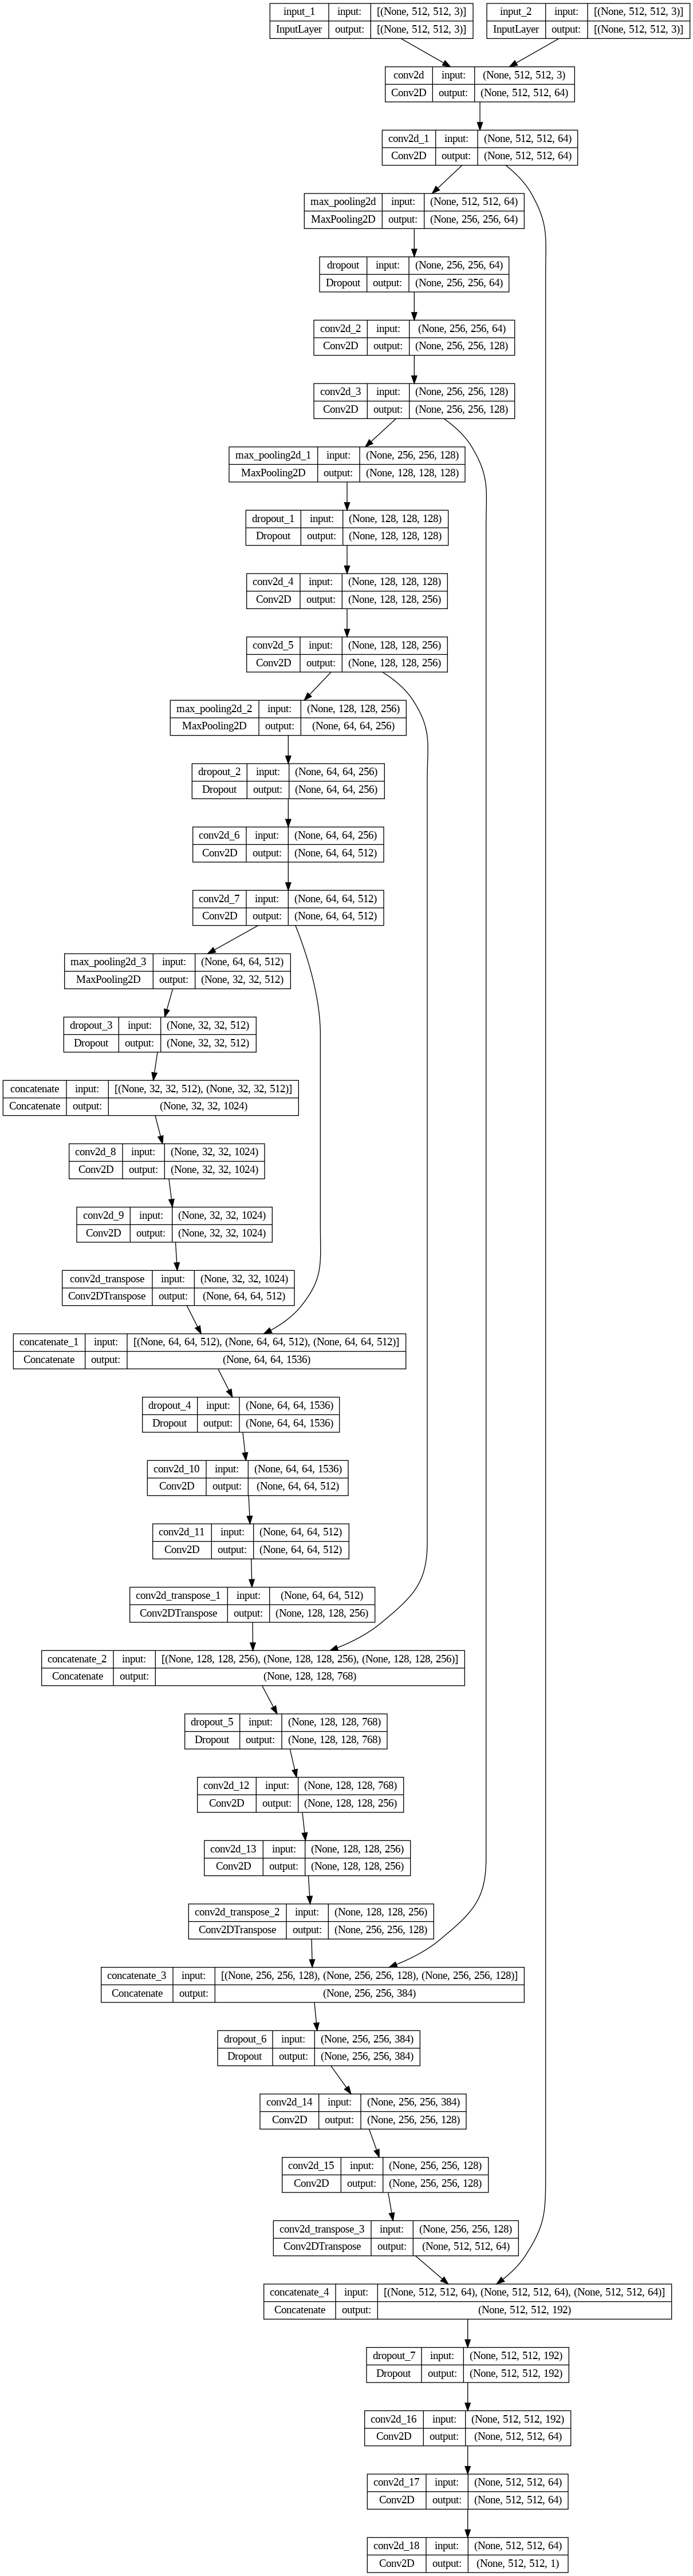

In [81]:
tf.keras.utils.plot_model(siam_unet_model, show_shapes=True)

In [82]:
compile_unet(siam_unet_model)

In [83]:
history = siam_unet_model.fit(
      [x1_train, x2_train], y_train,
      batch_size=BATCH_SIZE,
      epochs=EPOCHS,
      validation_data=([x1_test, x2_test], y_test)
    )

Epoch 1/20
66/66 [==============================] - 84s 3s/step - loss: 11.2296 - accuracy: 0.9684 - dice_coef: 0.0013 - binary_io_u: 0.4856 - f1_m: 0.0013 - precision_m: 0.0013 - recall_m: 0.0288 - val_loss: 2.6841 - val_accuracy: 0.9975 - val_dice_coef: 0.0000e+00 - val_binary_io_u: 0.4988 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 2/20
66/66 [==============================] - 30s 2s/step - loss: 2.1113 - accuracy: 0.9915 - dice_coef: 0.0037 - binary_io_u: 0.4972 - f1_m: 0.0037 - precision_m: 0.0046 - recall_m: 0.0057 - val_loss: 1.3979 - val_accuracy: 0.9975 - val_dice_coef: 0.0000e+00 - val_binary_io_u: 0.4988 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 3/20
66/66 [==============================] - 30s 2s/step - loss: 1.5883 - accuracy: 0.9922 - dice_coef: 0.0027 - binary_io_u: 0.4972 - f1_m: 0.0027 - precision_m: 0.0031 - recall_m: 0.0048 - val_loss: 1.2829 - val_accuracy: 0.9975 - val_dice_coef: 

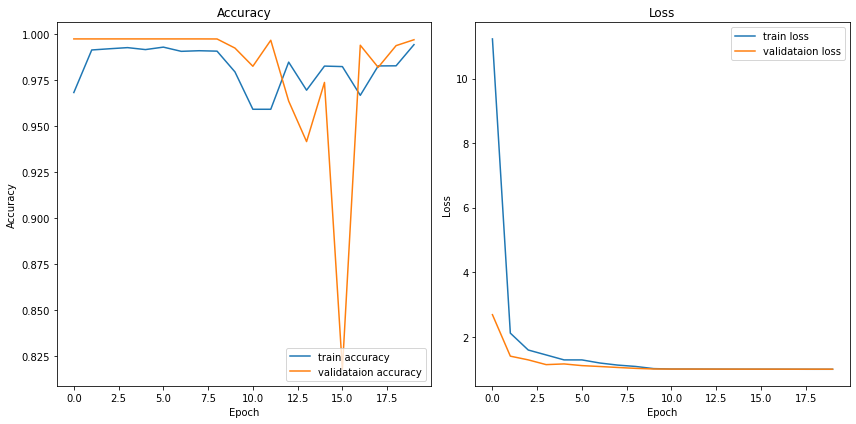

In [84]:
display_learning_curves(history)

In [85]:
print(x1_train[0].shape)
print(x2_train[0].shape)
preds = siam_unet_model.predict([x1_train[:1], x2_train[:1]])

(512, 512, 3)
(512, 512, 3)
1/1 [==============================] - 0s 289ms/step


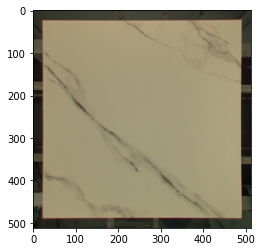

(<matplotlib.image.AxesImage at 0x7f4025adb0a0>, None)

In [86]:
plt.imshow(x1_train[0]), plt.show()

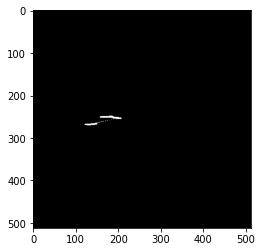

(<matplotlib.image.AxesImage at 0x7f4025a7ddc0>, None)

In [87]:
plt.imshow(y_test[0].reshape(y_test[0].shape[:-1]), cmap='gray'), plt.show()

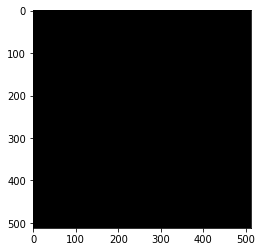

True

In [88]:
plt.imshow(preds[0].reshape((preds[0].shape[:-1])), cmap='gray'), plt.show()
cv.imwrite('pred.png', preds[0].reshape((preds[0].shape[:-1])))

1/1 [==============================] - 0s 25ms/step


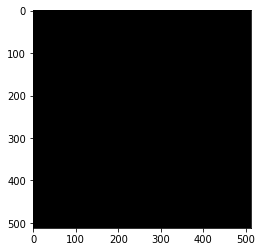

(<matplotlib.image.AxesImage at 0x7f4025bc11f0>, None)

In [89]:
preds = siam_unet_model.predict([x1_test[4:5], x2_test[4:5]])
plt.imshow(preds[0].reshape((preds[0].shape[:-1])), cmap='gray'), plt.show()